## DATASET HEART

il dataset heart contiene variabili relative a pazienti soggetti a problemi cardiaci

si cerca di prevedere se un paziente ha un problema cardiaco in funzione delle altre variabili

si importano le librerie

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from ISLP.models import ModelSpec
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF


ANALISI ESPLORATIVA


si importa il dataset

In [2]:
df = pd.read_csv('Heart.csv', sep=',')

si verifica la dimensione del df

vi sono 15 colonne e 303 righe, per un rapporto n/p pari a 303/15 = 20

In [3]:
df.shape

(303, 15)

si verifica il contenuto del df

vi sono sia variabili quantitative, sia qualitative

le variabili quantitative si estendono su 3 ordini di grandezza

vi è una colonna ridondante che contiene il numero progressivo di riga (Unnamed)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   Age         303 non-null    int64  
 2   Sex         303 non-null    int64  
 3   ChestPain   303 non-null    object 
 4   RestBP      303 non-null    int64  
 5   Chol        303 non-null    int64  
 6   Fbs         303 non-null    int64  
 7   RestECG     303 non-null    int64  
 8   MaxHR       303 non-null    int64  
 9   ExAng       303 non-null    int64  
 10  Oldpeak     303 non-null    float64
 11  Slope       303 non-null    int64  
 12  Ca          299 non-null    float64
 13  Thal        301 non-null    object 
 14  AHD         303 non-null    object 
dtypes: float64(2), int64(10), object(3)
memory usage: 35.6+ KB


In [5]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
print(df)

     Unnamed: 0  Age  Sex     ChestPain  RestBP  Chol  Fbs  RestECG  MaxHR  ExAng  Oldpeak  Slope   Ca        Thal  AHD
0             1   63    1       typical     145   233    1        2    150      0      2.3      3  0.0       fixed   No
1             2   67    1  asymptomatic     160   286    0        2    108      1      1.5      2  3.0      normal  Yes
2             3   67    1  asymptomatic     120   229    0        2    129      1      2.6      2  2.0  reversable  Yes
3             4   37    1    nonanginal     130   250    0        0    187      0      3.5      3  0.0      normal   No
4             5   41    0    nontypical     130   204    0        2    172      0      1.4      1  0.0      normal   No
5             6   56    1    nontypical     120   236    0        0    178      0      0.8      1  0.0      normal   No
6             7   62    0  asymptomatic     140   268    0        2    160      0      3.6      3  2.0      normal  Yes
7             8   57    0  asymptomatic 

si verificano le statistiche descrittive

sembra che le distribuzioni siano ben equilibrate, tranne Oldpeak

sembrano non esservi outlier

In [6]:
df.describe()

,Unnamed: 0,Age,Sex,RestBP,Chol,Fbs,RestECG,MaxHR,ExAng,Oldpeak,Slope,Ca
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,299.000000
mean,152.000000,54.438944,0.679868,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241
std,87.612784,9.038662,0.467299,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.937438
min,1.000000,29.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000


ANALISI DI DOMAIN KNOWLEDGE

Variabile da prevedere
- AHD: presenza/assenza di problema cardiaco

Dati personali
- Age: età        
- Sex: genere

Patologie correlate
- Thal: tipo di Thal

Sintomi
- ChestPain: tipo di dolore al torace o assenza

Esami di laboratorio
- Chol: colesterolo
- Fbs: glicemia (fasting blood sugar)

Esami strumentali
- Ca: numero di vasi che si colorano al test della fluorescenza

Valori a riposo
- RestBP: pressione massima a riposo   
- RestECG: livello ECG a riposo

Valori durante l'esercizio sotto sforzo
- MaxHR: massima frequenza cardiaca raggiunta    
- ExAng: presenza/assenza di angina durante l'esercizio   
- Oldpeak: depressione del tratto ST osservata durante l'esercizio
- Slope: pendenza del segmento ST osservata durante l'esercizio

il segmento ST è il tratto compreso tra la depolarizzazione e la ripolarizzazione dei ventricoli

DATA SCRUBBING

si elimina la colonna ridondante

In [7]:
del df['Unnamed: 0']

si verificano eventuali valori mancanti

il fattore Ca contiente 4 valori mancanti

si eliminano i relativi record

In [8]:
# np.isnan(df).sum()
df = df.dropna()

si convertono gli object in category

si distinguono le features dalla variabile di risposta e contestualmente si quantizzano le variabili categoriche con ModelSpec

In [9]:
df['ChestPain'] = df['ChestPain'].astype('category')
df['Thal'] = df['Thal'].astype('category')
df['AHD'] = df['AHD'].astype('category')

In [10]:
#allvars = df.columns.drop(['AHD', 'Age', 'RestBP', 'MaxHR', 'Chol', 'Slope'])
allvars = df.columns.drop(['AHD'])
X = ModelSpec(allvars, intercept=False).fit_transform(df)
y = ModelSpec(['AHD'], intercept=False).fit_transform(df)
#y = y.values.ravel()

c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if is_categorical[i]:
c:\users\admin\appdata\local\programs\python\python39\lib\site-packages\ISLP\models\columns.py:151: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To acce

In [12]:
y

,AHD[Yes]
0,0.0
1,1.0
2,1.0
3,0.0
4,0.0
...,...
297,1.0
298,1.0
299,1.0
300,1.0


in alternativa al metodo con ModelSpec si può usare get_dummies

In [14]:
df = pd.get_dummies(data=df, drop_first = True)

In [15]:
allvars = df.columns.drop(['AHD_Yes'])
y = df['AHD_Yes']
X = df[allvars]

si verifica la dimensionalità finale dei predittori

vi sono 16 predittori per 297 unità, per un rapporto di circa 297/16 = 18.5

In [16]:
X.shape

(297, 16)

si verifica la proporzione fra le classi della v.r.

si tratta di classi bilanciate 54% vs 46%

In [13]:
y.value_counts()
138/len(y)

0.46464646464646464

ANALISI DI EVENTUALI NON-LINEARITA', CORRELAZIONI, INTERAZIONI

si traccia istogramma delle variabili quantitative

per osservare se vi sono non-lnearità o outliers

le distribuzioni sono approssimabili a una Normale, eccetto OldPeak (come già osservato con analisi numerica)

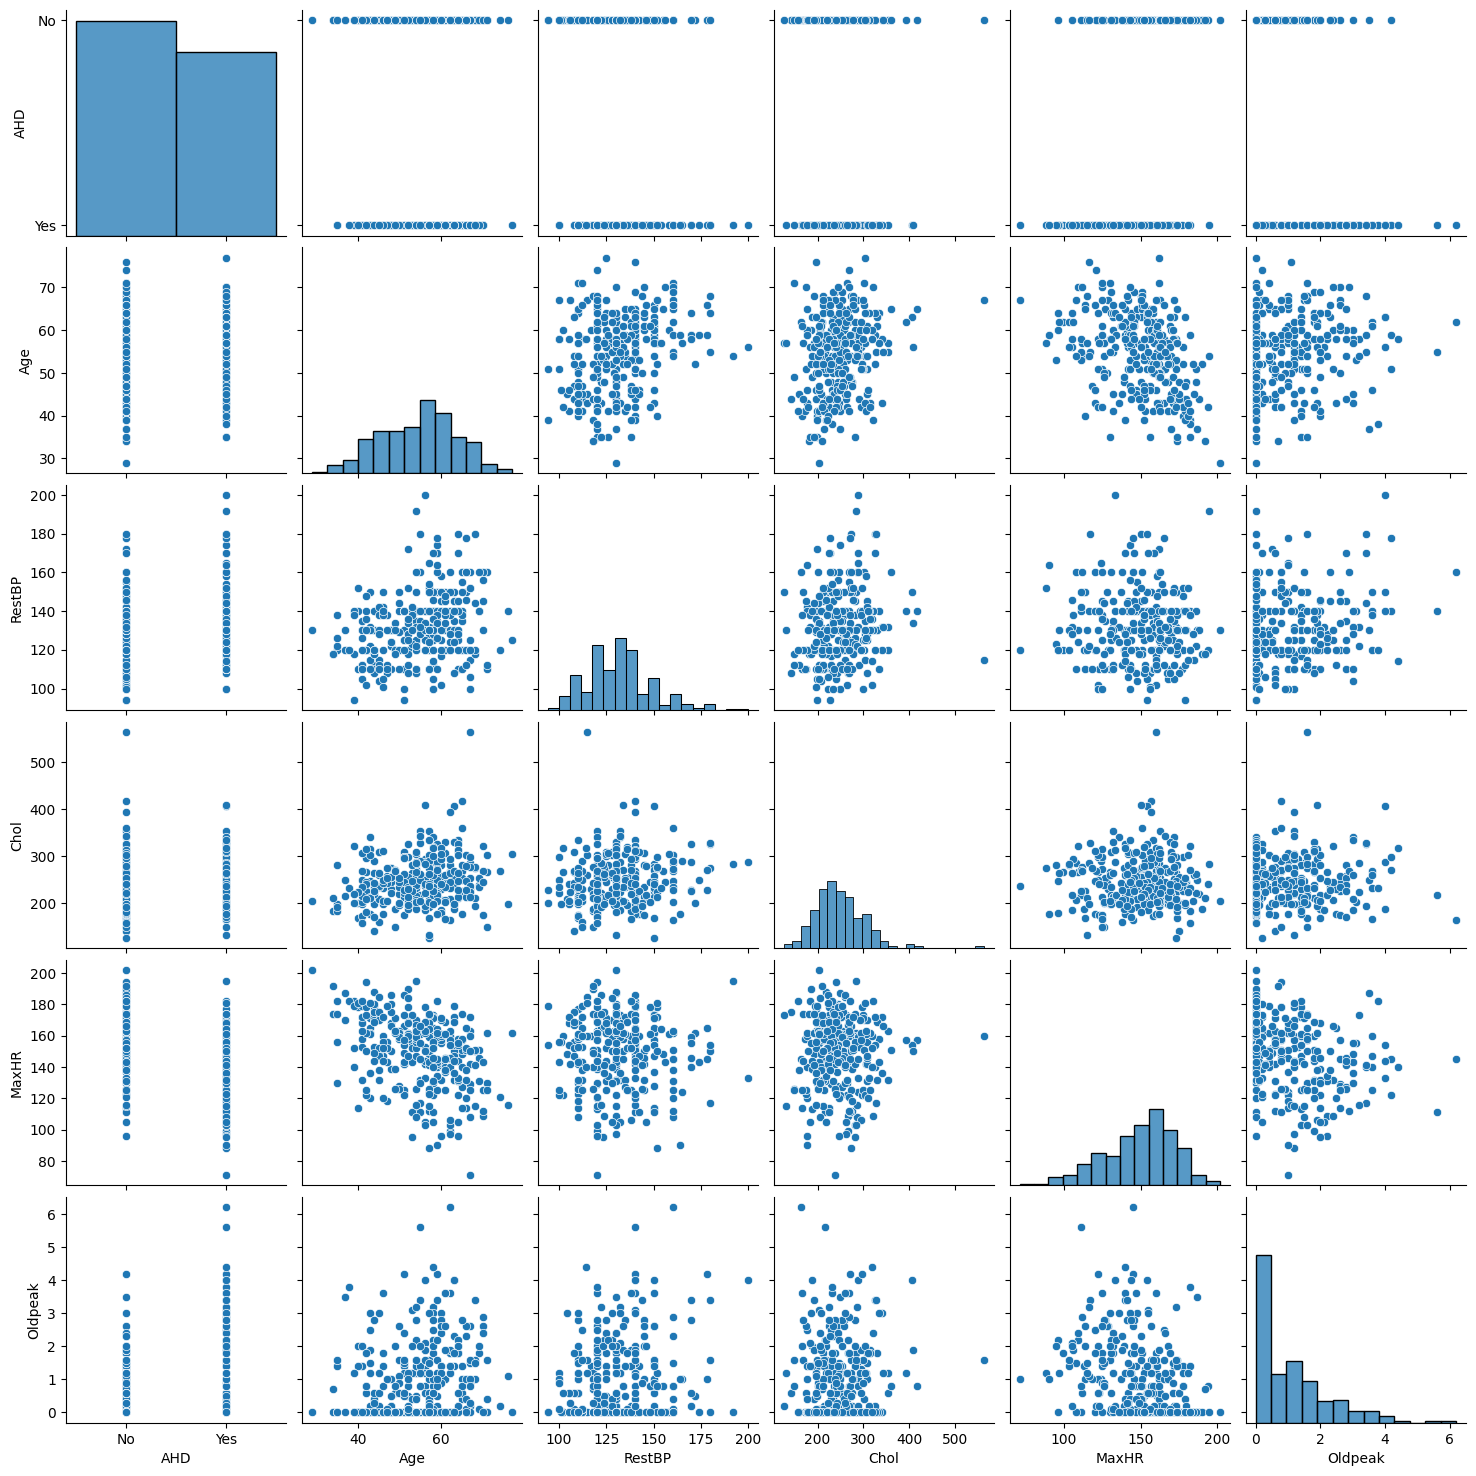

In [18]:
sns.pairplot(data=df, vars=['AHD', 'Age', 'RestBP', 'Chol', 'MaxHR', 'Oldpeak']);

si visualizza matrice delle correlazioni fra le variabili quantitative

in questo caso, essendo la v.r. qualitativa, le correlazioni analizzate sono solo tra predittori

NON vi sono correlazioni particolarmente evidenti (nessuna superiore a 0.6), eccetto fra i due livelli di thal

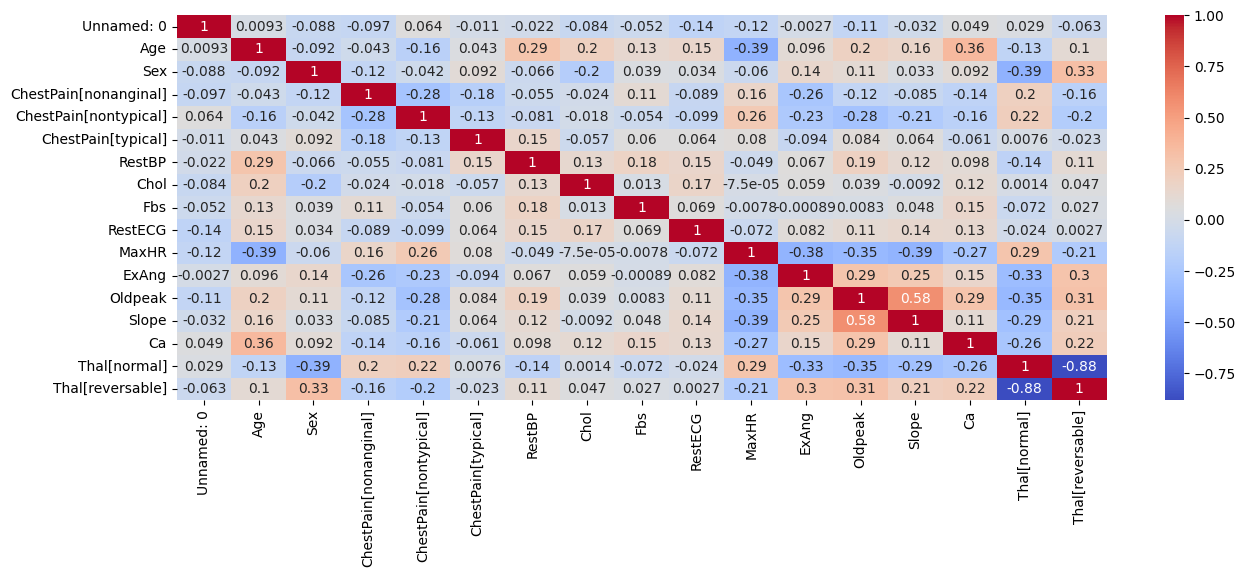

In [30]:
corrMatrix = X.corr()
fig, ax = plt.subplots(figsize=(15, 5))
sns.heatmap(corrMatrix, annot=True, cmap='coolwarm');

si indaga se fra le features vi siano collinearità NON identificabili attraverso la matrice di correlazione

Vi sono elevate collinearità

In [31]:
vif_data = pd.DataFrame() 
vif_data["feature"] = X.columns 
vif_data["VIF"] = [VIF(X.values, i) for i in range(len(X.columns))]
vif = vif_data["VIF"]
print(vif_data)

                  feature        VIF
0              Unnamed: 0   4.126468
1                     Age  43.481682
2                     Sex   3.677222
3   ChestPain[nonanginal]   2.111025
4   ChestPain[nontypical]   1.800409
5      ChestPain[typical]   1.322002
6                  RestBP  60.840615
7                    Chol  26.418329
8                     Fbs   1.288565
9                 RestECG   2.244108
10                  MaxHR  42.591828
11                  ExAng   2.068499
12                Oldpeak   3.345396
13                  Slope  11.597457
14                     Ca   2.092451
15           Thal[normal]  11.096390
16       Thal[reversable]   7.383758


i VIF sulle variabili standardizzate sono molto contenuti

In [13]:
scaler = StandardScaler()
scaler.fit(X)
X_std_tr = scaler.transform(X)
X_std = pd.DataFrame(X_std_tr, columns=X.columns);
vif_data_std = pd.DataFrame() 
vif_data_std["feature"] = X_std.columns 
vif_data_std["VIF"] = [VIF(X_std.values, i) for i in range(len(X_std.columns))]
vif_std = vif_data_std["VIF"]
print(vif_data_std)

RIEPILOGO ANALISI INIZIALE

poiché la presenza/assenza di problema cardiaco è una variabile categorica si tratta di un problema di classificazione

dataset con poche unità, soprattutto rispetto al numero delle features -> attenzione all'OVERFITTING (rapporto n/p = 18)
                                                                                      
le classi della v.r. sono bilanciate -> l'accuratezza è una metrica adeguata

i predittori NON mostrano particolari non-linearità -> NON particolare necessità di modello non-lineare

la matrice di correlazione NON mostra grandi correlazioni, MA il VIF mostra elevate collinearità -> necessità di modello non-parametrico

le interazioni possono essere indagate per ogni specifico modello, da cui l'eventuale opportunità relativa all'utilizzo di un modello refrattario a caratteristiche non-additive

i risultati dei metodi di identificazione dei fattori più determinanti devono essere recepiti con cautela poiché tra le feature sussistono molte collinearità

----------------------------